In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,comp_age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,"Senior Scientist, AAV Plasmid and Vector Platf...",$101K-$129K (Glassdoor Est.),Homology Medicines is seeking an outstanding S...,4.4,"Homology Medicines, Inc.\r\n4.4","Bedford, MA","Bedford, MA",51 to 200 employees,-1,Company - Public,...,115.0,"Homology Medicines, Inc.\r\n",MA,1,-1,0,0,0,0,1
1,Sr.Data Scientist/Computer Scientist,$101K-$129K (Glassdoor Est.),Why choose between doing meaningful work and h...,3.3,MITRE\r\n3.3,"McLean, VA","Bedford, MA",5001 to 10000 employees,1958,Non-profit Organisation,...,115.0,MITRE\r\n,VA,0,62,1,0,1,0,0
2,Data Engineer,$101K-$129K (Glassdoor Est.),Our client is a leading hedge fund looking to ...,4.2,NJF Global Holdings\r\n4.2,"New York, NY","London, United Kingdom",51 to 200 employees,2003,Company - Private,...,115.0,NJF Global Holdings\r\n,NY,0,17,1,0,0,0,0
3,Sr Data Engineer,$101K-$129K (Glassdoor Est.),Group O is seeking a strong candidate in the j...,3.1,Group O\r\n3.1,"San Antonio, TX","Milan, IL",1001 to 5000 employees,1974,Company - Private,...,115.0,Group O\r\n,TX,0,46,1,0,0,0,1
4,Senior Scientist,$101K-$129K (Glassdoor Est.),Position Description:\r\nThe position’s primar...,2.9,Exelixis\r\n2.9,"Alameda, CA","Alameda, CA",501 to 1000 employees,1994,Company - Public,...,115.0,Exelixis\r\n,CA,1,26,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'comp_age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
#Job title and seniority 
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [6]:
df['job_simple'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simple.value_counts()

na                703
data engineer     588
data scientist    353
analyst           126
mle               111
director           99
manager            20
Name: job_simple, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

senior    1110
na         888
junior       2
Name: seniority, dtype: int64

In [10]:
df.job_state.value_counts()

CA        604
MA        368
NY        185
VA        137
WI        110
UT        103
IN         62
AZ         61
SC         59
TN         56
TX         28
IL         24
MD         22
PA         18
NC         18
FL         17
OH         13
MO         13
WA         12
CO         12
NJ         10
Remote      9
NH          8
DC          8
US          6
MN          6
AL          6
MI          5
NE          4
GA          3
DE          2
CT          2
HI          2
IA          2
LA          1
MS          1
KY          1
OR          1
KS          1
Name: job_state, dtype: int64

In [11]:
#Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0        2323
1        3725
2        1366
3        2657
4        3714
5        3848
6        2873
7        1089
8        1952
9        3105
10       6797
11       5752
12       5770
13       3743
14       1863
15       2039
16       3397
17       2814
18       4459
19          2
20       4840
21          2
22       2416
23          2
24      10681
25          2
26       2346
27       4042
28       2576
29       2247
        ...  
1970      846
1971     3734
1972     2124
1973     3849
1974     1098
1975     5626
1976        2
1977     2873
1978        2
1979     5331
1980     3945
1981     1508
1982        2
1983     5985
1984     4059
1985     3321
1986     5406
1987     2589
1988     1962
1989     3458
1990        2
1991     2335
1992     1800
1993     1168
1994     3382
1995     2527
1996        2
1997     2157
1998     2378
1999     3217
Name: desc_len, Length: 2000, dtype: int64

In [12]:
#Competitor count
df['num_comp'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != -1 else 0)

In [13]:
df.num_comp

0       1
1       3
2       1
3       1
4       3
5       1
6       1
7       1
8       1
9       3
10      1
11      1
12      1
13      1
14      1
15      1
16      3
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      2
25      1
26      3
27      2
28      1
29      1
       ..
1970    1
1971    1
1972    1
1973    1
1974    1
1975    2
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    3
1996    1
1997    1
1998    1
1999    1
Name: num_comp, Length: 2000, dtype: int64

In [14]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [15]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
1956,1,42,76
1957,1,42,76
1958,1,42,76
1959,1,42,76
1960,1,42,76
1961,1,42,76
1962,1,42,76
1963,1,42,76
1964,1,42,76
1965,1,42,76


In [16]:
df.company_txt = df.company_txt.apply(lambda x: x.replace('\n', '').replace('\r', ''))
df.company_txt

0                Homology Medicines, Inc.
1                                   MITRE
2                     NJF Global Holdings
3                                 Group O
4                                Exelixis
5                                     LSQ
6                      Maxar Technologies
7                              SkillSoniq
8                                Novartis
9                    Edwards Lifesciences
10                   Bristol-Myers Squibb
11                   Moderna Therapeutics
12                   Moderna Therapeutics
13                                   CCRi
14             Revance Therapeutics, Inc.
15                 Enterprise Integration
16                  Signature Consultants
17                                   EQRx
18                                 TOLMAR
19                                 TOLMAR
20                         Quartet Health
21                         Quartet Health
22                             7Park Data
23                             7Pa

In [17]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,comp_age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.749800,1775.847000,0.015000,93.02950,170.893500,131.519000,0.495500,28.810000,0.465500,0.001000,0.226500,0.339000,0.433500,3881.447000,1.444500
std,0.704108,614.252004,0.121583,17.59086,33.654918,26.659337,0.500105,30.085469,0.498933,0.031615,0.418671,0.473488,0.495682,1791.204482,0.795762
min,-1.000000,-1.000000,0.000000,42.00000,76.000000,29.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,3.500000,1964.000000,0.000000,99.00000,149.000000,122.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2872.000000,1.000000
50%,3.900000,1994.000000,0.000000,99.00000,188.000000,143.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3605.000000,1.000000
75%,4.000000,2008.000000,0.000000,99.00000,188.000000,143.500000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4951.000000,2.000000
max,5.000000,2019.000000,1.000000,169.00000,281.000000,225.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10681.000000,3.000000


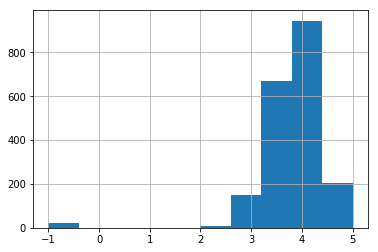

In [18]:
df.Rating.hist()

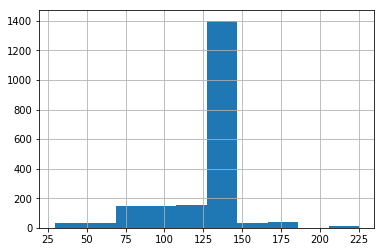

In [19]:
df.avg_salary.hist()

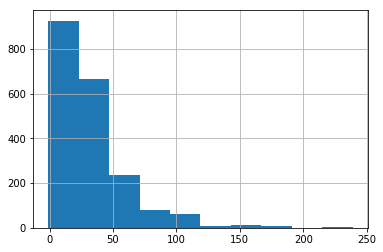

In [20]:
df.comp_age.hist()

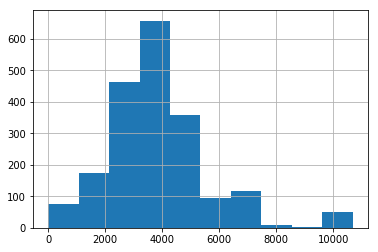

In [21]:
df.desc_len.hist()

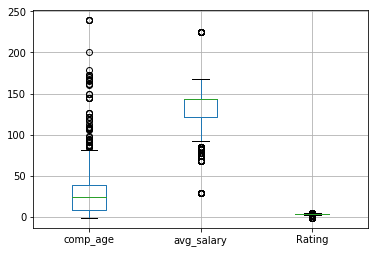

In [22]:
df.boxplot(column = ['comp_age','avg_salary','Rating'])

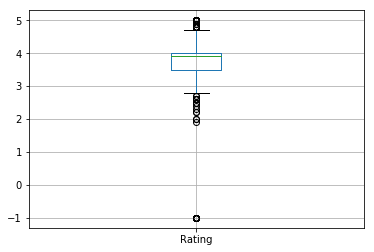

In [23]:
df.boxplot(column = 'Rating')

In [24]:
df[['comp_age','avg_salary','Rating','desc_len']].corr()

,comp_age,avg_salary,Rating,desc_len
comp_age,1.000000,-0.066312,-0.036242,0.177023
avg_salary,-0.066312,1.000000,0.026845,0.093688
Rating,-0.036242,0.026845,1.000000,0.064171
desc_len,0.177023,0.093688,0.064171,1.000000


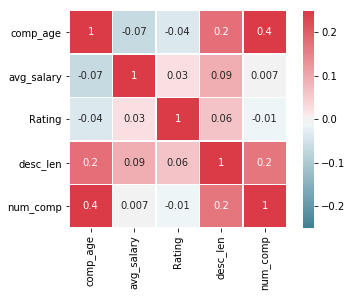

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['comp_age','avg_salary','Rating','desc_len', 'num_comp']].corr(),vmin=-0.25,vmax=0.25, center=0, cmap=cmap,
            square=True, linewidths=.5, annot = True, fmt='.1g')

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'comp_age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simple', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simple', 'seniority']]

Graph for Location: total = 215


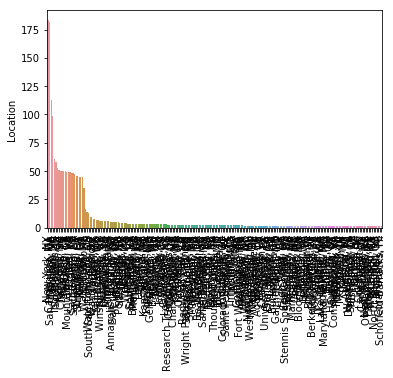

Graph for Headquarters: total = 221


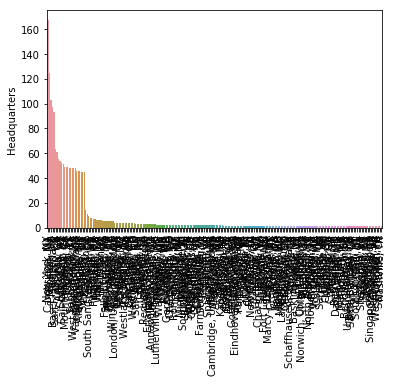

Graph for Size: total = 9


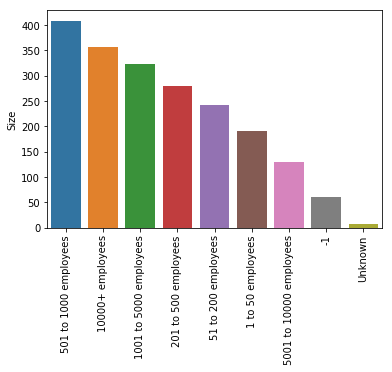

Graph for Type of ownership: total = 12


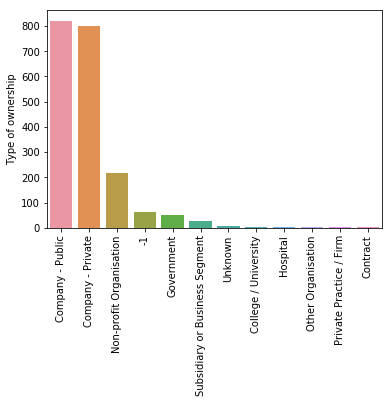

Graph for Industry: total = 65


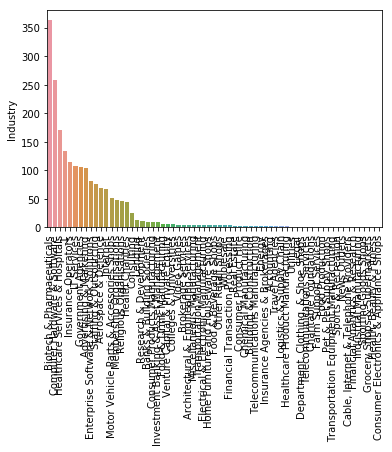

Graph for Sector: total = 24


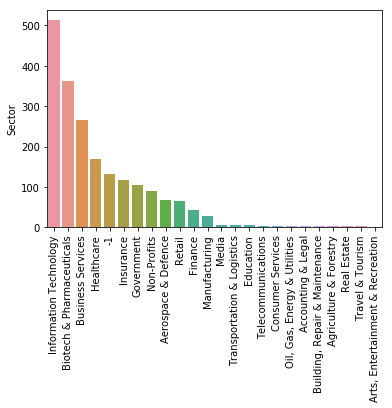

Graph for Revenue: total = 12


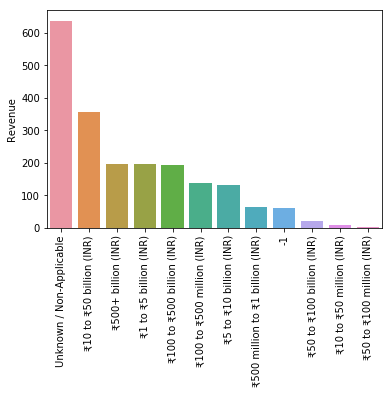

Graph for company_txt: total = 396


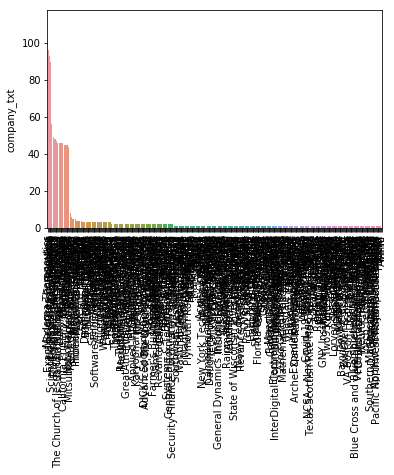

Graph for job_state: total = 39


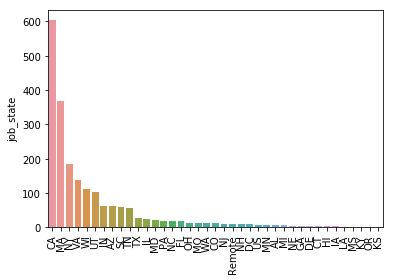

Graph for same_state: total = 2


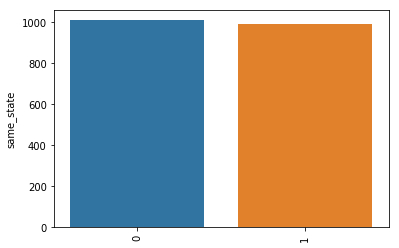

Graph for python_yn: total = 2


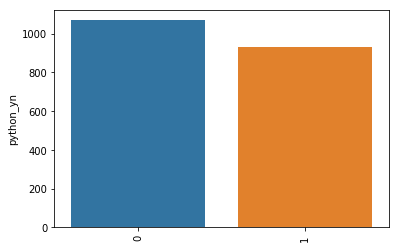

Graph for r_yn: total = 2


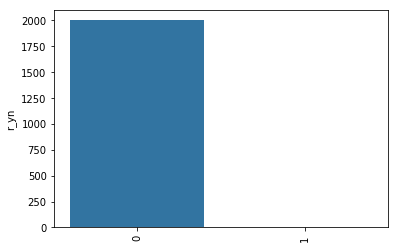

Graph for spark_yn: total = 2


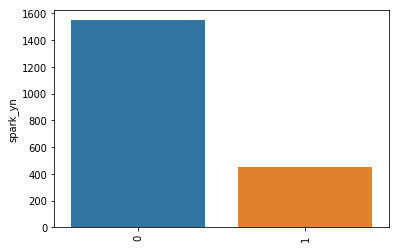

Graph for aws_yn: total = 2


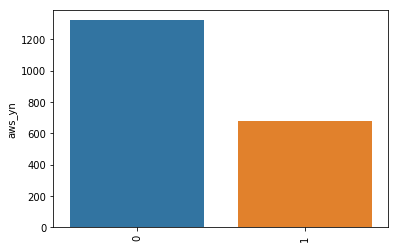

Graph for excel_yn: total = 2


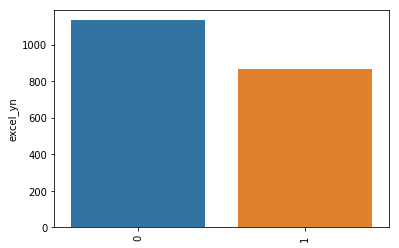

Graph for job_simple: total = 7


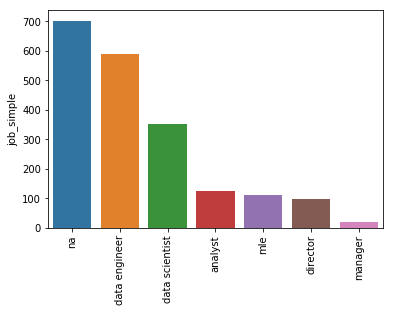

Graph for seniority: total = 3


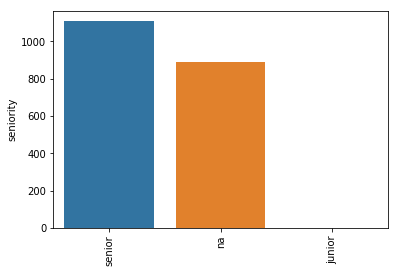

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"Graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


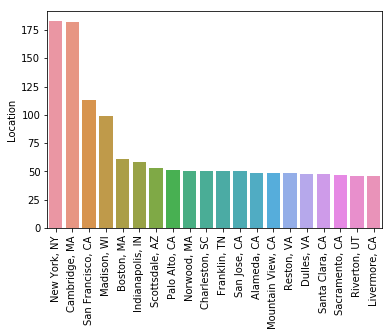

Graph for Headquarters: total = 20


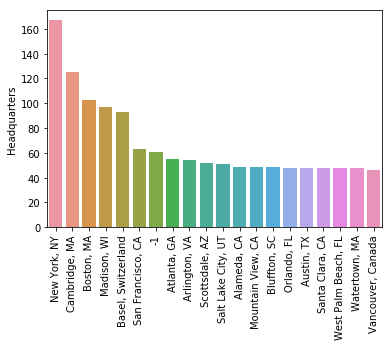

Graph for company_txt: total = 20


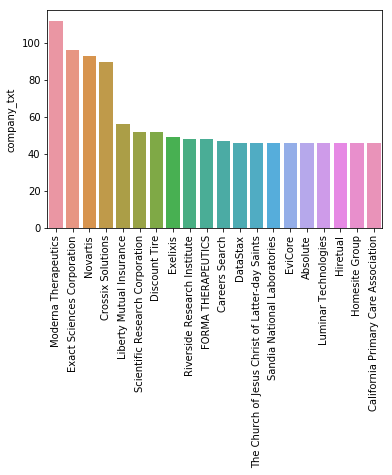

In [29]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print(f"Graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
pd.pivot_table(df, index = 'job_simple', values = 'avg_salary')

,avg_salary
job_simple,
analyst,115.210317
data engineer,137.882653
data scientist,115.667139
director,140.212121
manager,102.025000
mle,137.328829
na,135.776671


In [31]:
pd.pivot_table(df, index = ['job_simple','seniority'], values = 'avg_salary')

avg_salary
job_simple     seniority            
analyst        junior     112.500000
               na          98.767241
               senior     129.742424
data engineer  na         127.846386
               senior     141.830569
data scientist na         111.270992
               senior     128.324176
director       na         138.372549
               senior     142.166667
manager        na          96.500000
               senior     112.285714
mle            na         104.200000
               senior     140.608911
na             na         132.318598
               senior     138.801333

In [32]:
pd.pivot_table(df, index = ['job_state','job_simple'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simple                
WI        na              139.959184
          mle              82.500000
          data scientist  103.166667
          analyst          89.285714
WA        data scientist   95.357143
          data engineer    92.000000
          analyst         102.666667
VA        na              142.611702
          mle             105.375000
          data scientist  110.944444
          data engineer   119.000000
          analyst          82.500000
UT        data engineer   141.936170
          analyst         101.000000
          data scientist  111.333333
          manager         101.500000
          na               29.500000
US        data scientist  120.750000
          data engineer   105.500000
TX        na              109.625000
          data scientist  110.500000
          data engineer   114.136364
          analyst         120.750000
TN        data scientist  114.000000
          data engineer   137.068627
          analyst         129.250000
SC        na              142.715686
          manager         111.500000
          analyst         104.250000
Remote    data engineer   124.750000
...                              ...
FL        manager          82.666667
          director         71.250000
          data scientist  102.000000
          data engineer   119.500000
          analyst         103.500000
DE        na               93.000000
          data engineer   121.000000
DC        data scientist  115.250000
          analyst          80.750000
CT        data scientist  128.500000
CO        data scientist  119.500000
          analyst         101.000000
          data engineer    82.750000
          mle             144.500000
          na              139.250000
CA        na              134.797297
          mle             141.596774
          manager          98.000000
          director        143.500000
          data scientist  120.045045
          data engineer   141.709746
          analyst          93.000000
AZ        data scientist   94.750000
          data engineer   141.553191
          analyst         102.785714
          director        111.500000
          na               82.500000
AL        na              101.000000
          data scientist   86.250000
          data engineer   122.500000

[131 rows x 1 columns]

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['job_state','job_simple'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simple                
WI        na                      98
          mle                      2
          data scientist           3
          analyst                  7
WA        data scientist           7
          data engineer            2
          analyst                  3
VA        na                      94
          mle                      4
          data scientist          27
          data engineer           10
          analyst                  2
UT        data engineer           94
          analyst                  1
          data scientist           6
          manager                  1
          na                       1
US        data scientist           2
          data engineer            4
TX        na                       4
          data scientist          11
          data engineer           11
          analyst                  2
TN        data scientist           3
          data engineer           51
          analyst                  2
SC        na                      51
          manager                  2
          analyst                  6
Remote    data engineer            2
          analyst                  1
          data scientist           1
          na                       1
          mle                      4
PA        na                       2
          mle                      3
          data scientist           6
          analyst                  7
OR        data scientist           1
OH        na                       6
          data scientist           5
          data engineer            2
NY        analyst                 46
          director                46
          data scientist          33
          data engineer           52
          manager                  2
          na                       6
NJ        na                       3
          director                 1
          data scientist           2
          analyst                  4
NH        analyst                  4
          data scientist           1
          na                       3
NE        na                       1
          data scientist           3
NC        na                       8
          mle                      1
          manager                  4
          data scientist           4
          data engineer            1
MS        na                       1
MO        data scientist           8
          na                       1
          data engineer            3
          analyst                  1
MN        na                       3
          data scientist           2
          analyst                  1
MI        data engineer            2
          analyst                  3
MD        na                       5
          data scientist          11
          data engineer            1
          analyst                  5
MA        data scientist          70
          director                 1
          analyst                  5
          data engineer           51
          manager                  3
          mle                      3
          na                     235
LA        analyst                  1
KY        data scientist           1
KS        data scientist           1
IN        na                      55
          data scientist           2
          data engineer            4
          analyst                  1
IL        director                 1
          data engineer            6
          data scientist           9
          analyst                  3
          manager                  2
          na                       3
IA        analyst                  2
HI        data scientist           2
GA        data engineer            2
          data scientist           1
FL        na                       2
          manager                  3
          director                 2
          data scientist           7
          data engineer            1
          analyst                  2
DE        na                  

In [35]:
pd.pivot_table(df[df.job_simple == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
KS,148.500000
PA,146.666667
IN,134.750000
MN,134.500000
MA,133.335714
CT,128.500000
KY,122.000000
GA,122.000000
US,120.750000


In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [37]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(f'{i}\n******************************************************')
        print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
        print()

Rating
******************************************************
        avg_salary
Rating            
 2.3    144.500000
 3.9    140.126894
 4.0    136.075321
 4.2    136.073099
 3.2    135.831818
 4.5    135.316176
 4.9    133.833333
 3.3    133.580645
 2.9    133.423729
 3.6    132.351852
 4.1    131.284091
 3.1    128.919118
 5.0    128.857143
 3.4    128.676829
 3.7    126.806250
 3.5    125.186747
 3.8    122.989796
 4.3    121.863636
-1.0    120.195652
 1.9    119.500000
 2.6    115.833333
 2.8    111.833333
 2.2    109.250000
 4.6    105.142857
 2.0    103.500000
 2.5    102.833333
 2.4    101.000000
 4.7    100.846154
 4.4     96.045455
 3.0     94.045455
 2.7     89.000000
 4.8     83.593750

Industry
******************************************************
                                         avg_salary
Industry                                           
Sporting Goods Shops                     225.000000
Utilities                                148.500000
Religious Organisat

In [38]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()